<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/TensorFlow_and_PyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow on Fashion MNIST

##Preparation

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation, Add, ZeroPadding2D, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import datasets

from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomCrop, GaussianNoise

In [21]:
print(tf.__version__)

2.17.1


In [22]:
def plot_loss_acc(result):
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))

    ax[0].plot(result.history['loss'], label = 'Train Loss')
    ax[0].plot(result.history['val_loss'], label = 'Test Loss')
    ax[0].set_title('Model Loss')
    ax[0].legend()

    ax[1].plot(result.history['accuracy'], label = 'Train Acc')
    ax[1].plot(result.history['val_accuracy'], label = 'Test Acc')
    ax[1].set_title('Model Accuracy')
    ax[1].legend()

    plt.show()

In [45]:
fashion_mnist = datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [46]:
print(f'X_train shape: {X_train.shape} | X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape} | y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28) | X_test shape: (10000, 28, 28)
y_train shape: (60000,) | y_test shape: (10000,)


In [47]:
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

no_of_classes = len(labels)

In [48]:
image = X_train[0]/255
label = y_train[0]

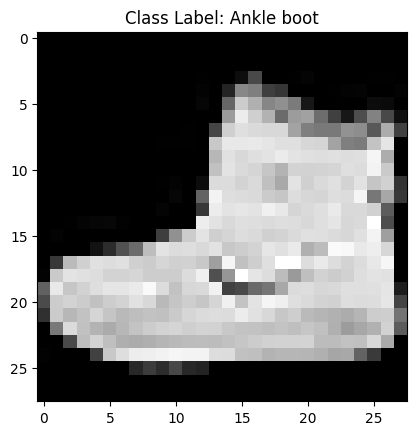

In [49]:
fig, ax = plt.subplots()
plt.imshow(image.squeeze(), cmap = "gray")
ax.set_title(f'Class Label: {labels[label]}')
plt.show();

In [50]:
X_train = X_train.reshape(X_train.shape +  (1,))/255
X_test = X_test.reshape(X_test.shape +  (1,))/255

In [51]:
input_shape = X_train[0].shape

In [52]:
class TF_CNNModel():
    def __init__(self, model, optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']):
        self.model = model
        self.optimizer = optimizer
        self.loss =loss
        self.metrics = metrics
        self.name = model.name
        self.result = None
        self.num_params = model.count_params()

    def summary(self):
        self.model.summary()

    def compile(self):
        self.model.compile(optimizer = self.optimizer, loss = self.loss, metrics = self.metrics)

    def fit(self, X_train, y_train, X_test, y_test, batch_size = 32, epochs = 10):
        self.result =  self.model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = batch_size, epochs = epochs)

In [53]:
class Results():
    def __init__(self):
        self.results = {}
        self.params = {}

    def add(self, *args):
        for Model in args:
            self.results[Model.name] = Model.result
            self.params[Model.name] = Model.num_params

    def delete(self, *args):
        for Model in args:
            del self.results[Model.name]
            del self.params[Model.name]

    def plot_loss_acc(self, fig_size = (8, 8)):
        fig, ax = plt.subplots(2, 2, figsize = fig_size)

        for model_name, result in self.results.items():
            ax[0, 0].plot(result.history['loss'], label = model_name)
            ax[0, 1].plot(result.history['val_loss'], label = model_name)
            ax[1, 0].plot(result.history['accuracy'], label = model_name)
            ax[1, 1].plot(result.history['val_accuracy'], label = model_name)

        ax[0, 0].set_title('Train Loss')
        ax[0, 0].legend()
        ax[0, 1].set_title('Test Loss')
        #ax[0, 1].legend()

        ax[1, 0].set_title('Train Accuracy')
        #ax[1, 0].legend()
        ax[1, 1].set_title('Test Accuracy')
        #ax[1, 1].legend()

        plt.show()

    def plot_num_params(self):
        fig, ax = plt.subplots()

        for model_name, param in self.params.items():
            ax.bar(model_name, height = param, label = model_name)

        ax.set_title('Number of Parameters')
        #ax.legend()
        plt.xticks(rotation = 45)
        plt.show()

    def print_num_params(self):
        for model_name, param in self.params.items():
            print(f'{model_name}: {param}')

In [54]:
def data_augmentation(flip = 'horizontal', rotation = 0.1, zoom = 0.1, cropped_size = (26, 26), stddev = 0.01):
    return Sequential([
        RandomFlip(flip),
        RandomRotation(rotation),
        RandomZoom(zoom),
        #RandomCrop(height = cropped_size[0], width = cropped_size[1]),
        #GaussianNoise(stddev = stddev)
    ])

## Simple CNN Models

In [13]:
#Base Model
i = Input(shape = input_shape)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(filters = 256, kernel_size = (2, 2), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
#x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
#x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_0_base = Model(i, x, name = 'model_0_base')

In [14]:
Model_0_Base = TF_CNNModel(model_0_base)

In [15]:
Model_0_Base.summary()

Model: "model_0_base"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 13, 13, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 256)           │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 360,714 (1.38 MB)

 Trainable params: 360,714 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
Model_0_Base.compile()
Model_0_Base.fit(X_train, y_train, X_test, y_test, epochs = 25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7522 - loss: 0.6698 - val_accuracy: 0.8510 - val_loss: 0.4011
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8673 - loss: 0.3524 - val_accuracy: 0.8681 - val_loss: 0.3549
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8889 - loss: 0.2943 - val_accuracy: 0.8851 - val_loss: 0.3184
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9034 - loss: 0.2563 - val_accuracy: 0.8862 - val_loss: 0.3117
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9144 - loss: 0.2255 - val_accuracy: 0.8946 - val_loss: 0.3050
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9269 - loss: 0.1974 - val_accuracy: 0.8968 - val_loss: 0.3035
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9365 - loss: 0.1685 - val_accuracy: 0.8953 - val_loss: 0.3350
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9411 - loss: 0.1517

In [17]:
#Base Model with Dropout
i = Input(shape = input_shape)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, activation = 'relu')(i)
x = Dropout(rate = 0.15)(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Dropout(rate = 0.15)(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Dropout(rate = 0.15)(x)
x = Conv2D(filters = 256, kernel_size = (2, 2), strides = 2, activation = 'relu')(x)
x = Dropout(rate = 0.15)(x)
x = Flatten()(x)
x = Dropout(rate = 0.15)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.15)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_1_dropout = Model(i, x, name = 'model_1_dropout')

In [18]:
Model_1_Dropout = TF_CNNModel(model_1_dropout)
Model_1_Dropout.compile()
Model_1_Dropout.fit(X_train, y_train, X_test, y_test, epochs = 25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7147 - loss: 0.7680 - val_accuracy: 0.8464 - val_loss: 0.4054
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8463 - loss: 0.4105 - val_accuracy: 0.8580 - val_loss: 0.3687
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8661 - loss: 0.3580 - val_accuracy: 0.8729 - val_loss: 0.3420
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8768 - loss: 0.3290 - val_accuracy: 0.8790 - val_loss: 0.3218
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8853 - loss: 0.3045 - val_accuracy: 0.8857 - val_loss: 0.3163
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8910 - loss: 0.2909 - val_accuracy: 0.8922 - val_loss: 0.2951
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8954 - loss: 0.2770 - val_accuracy: 0.8873 - val_loss: 0.3209
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9001 - loss: 0.2

In [19]:
#Base Model with BatchNorm
i = Input(shape = input_shape)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 256, kernel_size = (2, 2), strides = 2, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
#x = Dropout(rate = 0.15)(x)
x = Dense(units = 512, activation = 'relu')(x)
#x = Dropout(rate = 0.15)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_2a_batchnorm = Model(i, x, name = 'model_2a_batchnorm')

In [20]:
Model_2a_BatchNorm = TF_CNNModel(model_2a_batchnorm)
Model_2a_BatchNorm.compile()
Model_2a_BatchNorm.fit(X_train, y_train, X_test, y_test, epochs = 25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7998 - loss: 0.5598 - val_accuracy: 0.8535 - val_loss: 0.3949
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8718 - loss: 0.3425 - val_accuracy: 0.8671 - val_loss: 0.3758
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8929 - loss: 0.2839 - val_accuracy: 0.8740 - val_loss: 0.3465
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9056 - loss: 0.2549 - val_accuracy: 0.8852 - val_loss: 0.3270
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9116 - loss: 0.2344 - val_accuracy: 0.8850 - val_loss: 0.3239
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9190 - loss: 0.2063 - val_accuracy: 0.8931 - val_loss: 0.3159
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9279 - loss: 0.1876 - val_accuracy: 0.8949 - val_loss: 0.3088
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9378 - loss: 0.1

In [22]:
#Base Model with BatchNorm and activation after BatchNorm
i = Input(shape = input_shape)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2)(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 256, kernel_size = (2, 2), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Flatten()(x)
#x = Dropout(rate = 0.15)(x)
x = Dense(units = 512, activation = 'relu')(x)
#x = Dropout(rate = 0.15)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_2b_batchnorm = Model(i, x, name = 'model_2b_batchnorm')

In [23]:
Model_2b_BatchNorm = TF_CNNModel(model_2b_batchnorm)
Model_2b_BatchNorm.compile()
Model_2b_BatchNorm.fit(X_train, y_train, X_test, y_test, epochs = 25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7942 - loss: 0.5682 - val_accuracy: 0.8626 - val_loss: 0.3803
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8782 - loss: 0.3302 - val_accuracy: 0.8809 - val_loss: 0.3235
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8958 - loss: 0.2775 - val_accuracy: 0.8791 - val_loss: 0.3235
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9102 - loss: 0.2388 - val_accuracy: 0.8942 - val_loss: 0.2957
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9182 - loss: 0.2145 - val_accuracy: 0.8888 - val_loss: 0.3198
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9261 - loss: 0.1935 - val_accuracy: 0.8969 - val_loss: 0.2959
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9338 - loss: 0.1742 - val_accuracy: 0.9015 - val_loss: 0.2847
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9420 - loss: 0.152

In [25]:
augmentation = data_augmentation()

In [ ]:
#try augmenting an image
augmentation = data_augmentation()
image = augmentation(X_train[0]).numpy()

fig, ax = plt.subplots()
plt.imshow(image.squeeze(), cmap = "gray")
ax.set_title(f'Class Label: {labels[label]}')
plt.show();

In [26]:
#Base Model with Augmentation
i = Input(shape = input_shape)
x = augmentation(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(filters = 256, kernel_size = (2, 2), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
#x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
#x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_3_augmentation = Model(i, x, name = 'model_3_augmentation')

In [27]:
Model_3_Augmentation = TF_CNNModel(model_3_augmentation)
Model_3_Augmentation.compile()
Model_3_Augmentation.fit(X_train, y_train, X_test, y_test, epochs = 25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6497 - loss: 0.9208 - val_accuracy: 0.7592 - val_loss: 0.6324
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7864 - loss: 0.5627 - val_accuracy: 0.8016 - val_loss: 0.5380
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8125 - loss: 0.4929 - val_accuracy: 0.8260 - val_loss: 0.4692
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8315 - loss: 0.4492 - val_accuracy: 0.8111 - val_loss: 0.5113
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8403 - loss: 0.4223 - val_accuracy: 0.8073 - val_loss: 0.5260
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8491 - loss: 0.4005 - val_accuracy: 0.8374 - val_loss: 0.4453
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8586 - loss: 0.3799 - val_accuracy: 0.8381 - val_loss: 0.4319
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.8605 - loss: 

In [28]:
#Base Model with Dropout, BatchNorm and Augmentation
i = Input(shape = input_shape)
x = augmentation(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(rate = 0.15)(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(rate = 0.15)(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(rate = 0.15)(x)
x = Conv2D(filters = 256, kernel_size = (2, 2), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(rate = 0.15)(x)
x = Flatten()(x)
x = Dropout(rate = 0.15)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.15)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_4_all = Model(i, x, name = 'model_4_all')

In [29]:
Model_4_All = TF_CNNModel(model_4_all)
Model_4_All.compile()
Model_4_All.fit(X_train, y_train, X_test, y_test, epochs = 25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.6501 - loss: 0.9381 - val_accuracy: 0.7702 - val_loss: 0.6081
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7647 - loss: 0.6322 - val_accuracy: 0.7805 - val_loss: 0.5765
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7885 - loss: 0.5756 - val_accuracy: 0.8155 - val_loss: 0.4852
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accuracy: 0.8039 - loss: 0.5331 - val_accuracy: 0.8231 - val_loss: 0.4950
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.8104 - loss: 0.5115 - val_accuracy: 0.8198 - val_loss: 0.4696
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.8221 - loss: 0.4887 - val_accuracy: 0.8361 - val_loss: 0.4372
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8241 - loss: 0.4788 - val_accuracy: 0.8259 - val_loss: 0.4627
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.8260 -

In [40]:
#Base Model with Dropout, BatchNorm and Augmentation
i = Input(shape = input_shape)
x = augmentation(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(rate = 0.15)(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(rate = 0.15)(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(rate = 0.15)(x)
x = Conv2D(filters = 256, kernel_size = (2, 2), strides = 2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(rate = 0.15)(x)
x = Flatten()(x)
x = Dropout(rate = 0.15)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.15)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_4b_all = Model(i, x, name = 'model_4b_all')

In [41]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

Model_4b_All = TF_CNNModel(model_4b_all, optimizer = optimizer)
Model_4b_All.compile()
Model_4b_All.fit(X_train, y_train, X_test, y_test, batch_size = 128, epochs = 25)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6483 - loss: 0.9806 - val_accuracy: 0.7652 - val_loss: 0.6258
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7597 - loss: 0.6455 - val_accuracy: 0.6975 - val_loss: 0.8796
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7813 - loss: 0.5941 - val_accuracy: 0.8146 - val_loss: 0.5137
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7981 - loss: 0.5565 - val_accuracy: 0.8093 - val_loss: 0.5008
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8041 - loss: 0.5335 - val_accuracy: 0.8111 - val_loss: 0.5214
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8090 - loss: 0.5176 - val_accuracy: 0.8042 - val_loss: 0.5285
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8126 - loss: 0.5129 - val_accuracy: 0.8178 - val_loss: 0.5005
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8192 - loss: 0.5025 - val

In [30]:
#Base Model with Skip Connection
i = Input(shape = input_shape)
#x = augmentation(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, activation = 'relu')(i)

x1_shortcut = x
x1_shortcut = Conv2D(filters = 64, kernel_size = (2, 2), strides = 2)(x1_shortcut)

x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Add()([x1_shortcut, x])

x2_shortcut = x
x2_shortcut = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2)(x2_shortcut)

x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Add()([x2_shortcut, x])

x = Conv2D(filters = 256, kernel_size = (2, 2), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
#x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
#x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_5_skip = Model(i, x, name = 'model_4_skip')

In [31]:
Model_5_Skip = TF_CNNModel(model_5_skip)
Model_5_Skip.compile()
Model_5_Skip.fit(X_train, y_train, X_test, y_test, epochs = 25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7709 - loss: 0.6250 - val_accuracy: 0.8523 - val_loss: 0.4044
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8676 - loss: 0.3494 - val_accuracy: 0.8716 - val_loss: 0.3605
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8902 - loss: 0.2904 - val_accuracy: 0.8788 - val_loss: 0.3330
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9032 - loss: 0.2573 - val_accuracy: 0.8801 - val_loss: 0.3463
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9114 - loss: 0.2358 - val_accuracy: 0.8944 - val_loss: 0.3051
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9198 - loss: 0.2099 - val_accuracy: 0.8878 - val_loss: 0.3268
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9262 - loss: 0.1903 - val_accuracy: 0.8903 - val_loss: 0.3330
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9316 - loss: 0.17

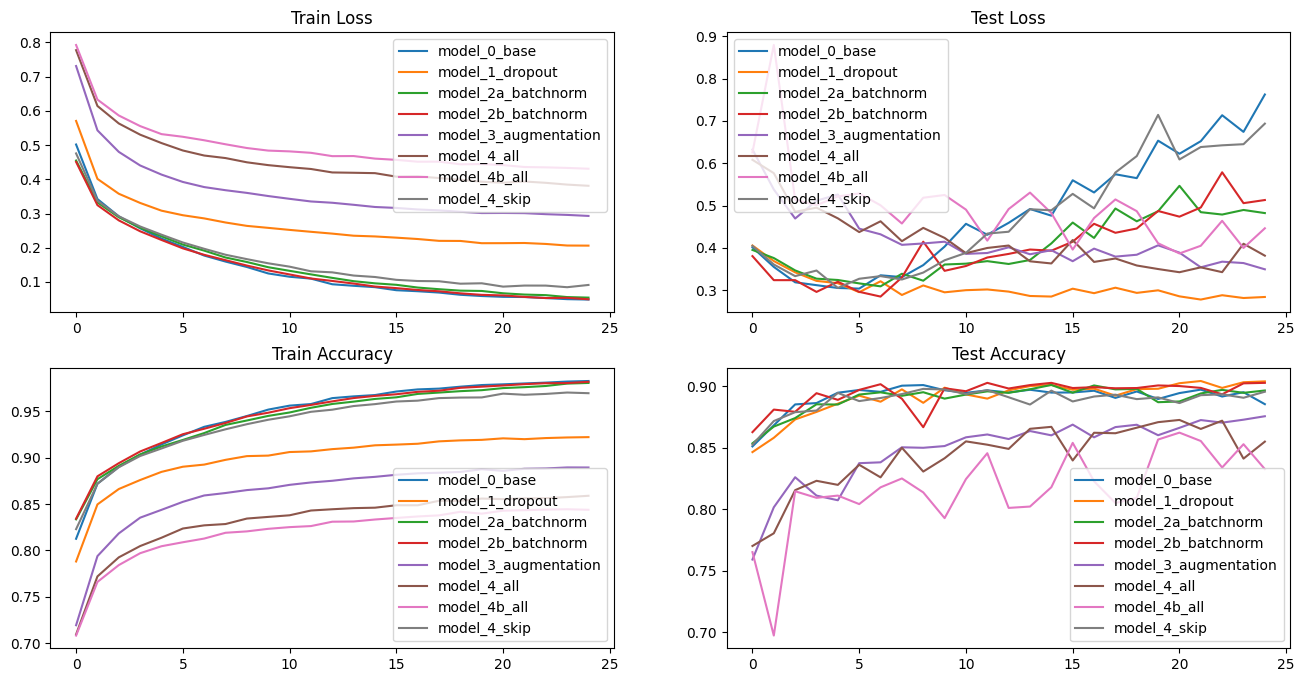

In [46]:
simple_CNN_results = Results()
simple_CNN_results.add(Model_0_Base,
            Model_1_Dropout,
            Model_2a_BatchNorm,
            Model_2b_BatchNorm,
            Model_3_Augmentation,
            Model_4_All,
            Model_4b_All,
            Model_5_Skip)

simple_CNN_results.plot_loss_acc(fig_size = (16, 8))

model_0_base: 360714
model_1_dropout: 360714
model_2a_batchnorm: 362634
model_2b_batchnorm: 362634
model_3_augmentation: 360714
model_4_all: 362634
model_4b_all: 362634
model_4_skip: 442826


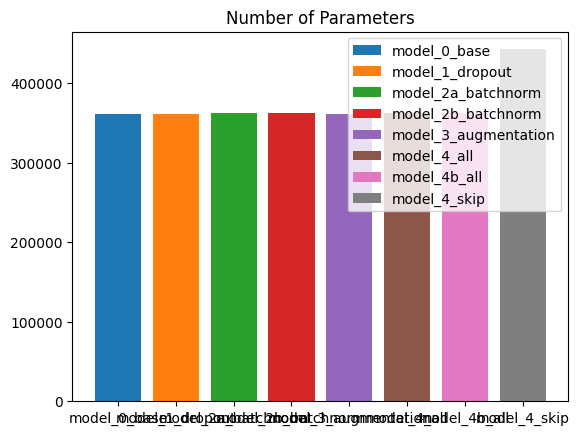

In [47]:
simple_CNN_results.print_num_params()
simple_CNN_results.plot_num_params()

## CNN Models with More Layers

In [55]:
augmentation = data_augmentation()

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)

x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_6 = Model(i, x, name = 'model_6')

In [69]:
Model_6 = TF_CNNModel(model_6)
Model_6.summary()

Model: "model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 28, 28, 1)      │              0 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_131 (Conv2D)       │ (None, 28, 28, 32)     │            320 │ sequential_1[8][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_128   │ (None, 28, 28, 32)     │            128 │ conv2d_131[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_114            │ (None, 28, 28, 32)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_128 (Dropout)     │ (None, 28, 28, 32)     │              0 │ activation_114[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_132 (Conv2D)       │ (None, 28, 28, 32)     │          9,248 │ dropout_128[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_129   │ (None, 28, 28, 32)     │            128 │ conv2d_132[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_115            │ (None, 28, 28, 32)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_129 (Dropout)     │ (None, 28, 28, 32)     │              0 │ activation_115[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_133 (Conv2D)       │ (None, 28, 28, 32)     │          9,248 │ dropout_129[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_130   │ (None, 28, 28, 32)     │            128 │ conv2d_133[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_116            │ (None, 28, 28, 32)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_130 (Dropout)     │ (None, 28, 28, 32)     │              0 │ activation_116[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_31          │ (None, 14, 14, 32)     │              0 │ dropout_130[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_135 (Conv2D)  

 Total params: 1,455,114 (5.55 MB)

 Trainable params: 1,451,338 (5.54 MB)

 Non-trainable params: 3,776 (14.75 KB)

In [59]:
Model_6.compile()
Model_6.fit(X_train, y_train, X_test, y_test, epochs = 25)

Epoch 1/25
  26/1875 ━━━━━━━━━━━━━━━━━━━━ 25:47 837ms/step - accuracy: 0.1046 - loss: 2.8611

KeyboardInterrupt: 

In [68]:
i = Input(shape = input_shape)
x = augmentation(i)

x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x1_shortcut = x
x1_shortcut = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, padding = 'same')(x1_shortcut)
x1_shortcut = BatchNormalization()(x1_shortcut)

x = Conv2D(filters = 64, kernel_size = (1, 1), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 64, kernel_size = (1, 1), strides = 1, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Add()([x1_shortcut, x])

x = Activation('relu')(x)
x = Dropout(0.15)(x)
#x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x2_shortcut = x
x2_shortcut = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, padding = 'same')(x2_shortcut)
x2_shortcut = BatchNormalization()(x2_shortcut)

x = Conv2D(filters = 128, kernel_size = (1, 1), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 128, kernel_size = (1, 1), strides = 1, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Add()([x2_shortcut, x])

x = Activation('relu')(x)
x = Dropout(0.15)(x)
#x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x3_shortcut = x
x3_shortcut = Conv2D(filters = 256, kernel_size = (3, 3), strides = 2, padding = 'same')(x3_shortcut)
x3_shortcut = BatchNormalization()(x3_shortcut)

x = Conv2D(filters = 256, kernel_size = (1, 1), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = Conv2D(filters = 256, kernel_size = (1, 1), strides = 1, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Add()([x3_shortcut, x])

x = Activation('relu')(x)
x = Dropout(0.15)(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_6_skip = Model(i, x, name = 'model_6_skip')

In [70]:
Model_6_skip = TF_CNNModel(model_6_skip)
Model_6_skip.summary()

Model: "model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 28, 28, 1)      │              0 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_131 (Conv2D)       │ (None, 28, 28, 32)     │            320 │ sequential_1[8][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_128   │ (None, 28, 28, 32)     │            128 │ conv2d_131[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_114            │ (None, 28, 28, 32)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_128 (Dropout)     │ (None, 28, 28, 32)     │              0 │ activation_114[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_132 (Conv2D)       │ (None, 28, 28, 32)     │          9,248 │ dropout_128[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_129   │ (None, 28, 28, 32)     │            128 │ conv2d_132[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_115            │ (None, 28, 28, 32)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_129 (Dropout)     │ (None, 28, 28, 32)     │              0 │ activation_115[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_133 (Conv2D)       │ (None, 28, 28, 32)     │          9,248 │ dropout_129[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_130   │ (None, 28, 28, 32)     │            128 │ conv2d_133[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_116            │ (None, 28, 28, 32)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_130 (Dropout)     │ (None, 28, 28, 32)     │              0 │ activation_116[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_31          │ (None, 14, 14, 32)     │              0 │ dropout_130[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_135 (Conv2D)  

 Total params: 1,455,114 (5.55 MB)

 Trainable params: 1,451,338 (5.54 MB)

 Non-trainable params: 3,776 (14.75 KB)

In [ ]:
Model_6_skip.compile()
Model_6_skip.fit(X_train, y_train, X_test, y_test, epochs = 25)

# PyTorch on Fashion MNIST

## Preparation

In [ ]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 33.6 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn

#torchvision for datasets and image transformation
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

#split into mini batches
from torch.utils.data import DataLoader

import torchmetrics, mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

from tqdm.auto import tqdm
from timeit import default_timer as timer

import os

from torchsummary import summary
from torchvision.transforms import v2

import numpy as np

In [ ]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(device)

cuda


In [ ]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 109MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 5.17MB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 58.1MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 19.4MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
#sample data
image, label = train_data[0]

class_names = train_data.classes
print(image.shape)
print(class_names)

torch.Size([1, 28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


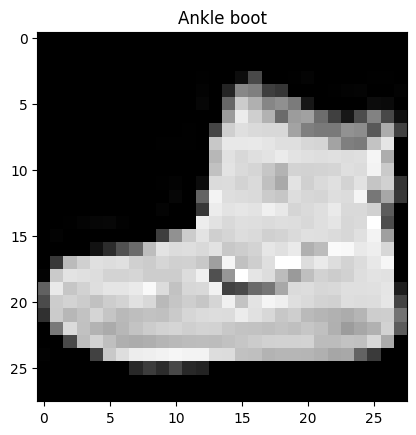

In [ ]:
fig, ax = plt.subplots()

plt.imshow(image.squeeze(), cmap = 'grey')
ax.set_title(label = class_names[label])
plt.show();

In [ ]:
#Put dataset in dataloader, making it into batches
batch_size = 32
num_workers = os.cpu_count()

train_dataloader = DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = num_workers)
test_dataloader = DataLoader(test_data, batch_size = batch_size, shuffle = False, num_workers = num_workers)

In [ ]:
def train_step(model, dataloader, loss_fcn, optimizer, device):

    model.train()

    train_loss = 0
    train_acc = 0

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)

        y_pred = model(X)

        loss = loss_fcn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
        train_acc += ((y_pred_class == y)).sum().item()/len(y_pred)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc

In [ ]:
def test_step(model, dataloader, loss_fcn, device):

    test_loss = 0
    test_acc = 0

    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X = X.to(device)
            y = y.to(device)

            y_pred = model(X)

            loss = loss_fcn(y_pred, y)
            test_loss += loss.item()

            y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
            test_acc += ((y_pred_class == y)).sum().item()/len(y_pred)

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    return test_loss, test_acc

In [ ]:
def training(model, train_dataloader, test_dataloader, optimizer, device, loss_fcn = nn.CrossEntropyLoss(), display_interval = 1, epochs = 15):
    results = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

    for epoch in tqdm(range(epochs)):
        train_start = timer()
        train_loss, train_acc = train_step(model, train_dataloader, loss_fcn, optimizer, device)
        train_end = timer()
        test_start = timer()
        test_loss, test_acc = test_step(model, test_dataloader, loss_fcn, device)
        test_end = timer()

        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

        if epoch == 0 or (epoch+1)%display_interval == 0:
            print(f"Epoch {epoch + 1}| train loss: {train_loss:.3f} | train acc: {train_acc:.3f} | train time: {train_end - train_start:.3f} | test loss: {test_loss:.3f} | test acc: {test_acc:.3f} | test time: {test_end - test_start:.3f}")

    return results

In [ ]:
def plot_loss_acc(results):
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))

    ax[0].plot(results['train_loss'], label = 'Train Loss')
    ax[0].plot(results['test_loss'], label = 'Test Loss')
    ax[0].set_title('Model Loss')
    ax[0].legend()

    ax[1].plot(results['train_acc'], label = 'Train Acc')
    ax[1].plot(results['test_acc'], label = 'Test Acc')
    ax[1].set_title('Model Accuracy')
    ax[1].legend()

    plt.show()

## Simple CNN Models

In [ ]:
#Base Model
class BaseModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_3 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_4 = nn.Sequential(
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (2, 2), stride = 2),
            nn.ReLU()
        )

        self.connected_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 256, out_features = 512),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 512, out_features = 10)
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_4(x)
        x = self.connected_layer(x)

        return x

In [ ]:
base_model = BaseModel().to(device)
summary(base_model, input_size = image.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 13, 13]             320
              ReLU-2           [-1, 32, 13, 13]               0
            Conv2d-3             [-1, 64, 6, 6]          18,496
              ReLU-4             [-1, 64, 6, 6]               0
            Conv2d-5            [-1, 128, 2, 2]          73,856
              ReLU-6            [-1, 128, 2, 2]               0
            Conv2d-7            [-1, 256, 1, 1]         131,328
              ReLU-8            [-1, 256, 1, 1]               0
           Flatten-9                  [-1, 256]               0
          Dropout-10                  [-1, 256]               0
           Linear-11                  [-1, 512]         131,584
             ReLU-12                  [-1, 512]               0
          Dropout-13                  [-1, 512]               0
           Linear-14                   

In [ ]:
optimizer = torch.optim.Adam(params = base_model.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(base_model, train_dataloader, test_dataloader, optimizer, device, loss_fcn)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1| train loss: 0.586 | train acc: 0.782 | train time: 32.824 | test loss: 0.426 | test acc: 0.841 | test time: 2.740
Epoch 2| train loss: 0.386 | train acc: 0.856 | train time: 42.936 | test loss: 0.373 | test acc: 0.861 | test time: 3.497
Epoch 3| train loss: 0.329 | train acc: 0.877 | train time: 44.953 | test loss: 0.345 | test acc: 0.876 | test time: 1.915
Epoch 4| train loss: 0.293 | train acc: 0.892 | train time: 28.798 | test loss: 0.327 | test acc: 0.880 | test time: 1.951
Epoch 5| train loss: 0.264 | train acc: 0.901 | train time: 30.192 | test loss: 0.341 | test acc: 0.880 | test time: 1.659
Epoch 6| train loss: 0.240 | train acc: 0.909 | train time: 29.277 | test loss: 0.311 | test acc: 0.892 | test time: 1.659
Epoch 7| train loss: 0.216 | train acc: 0.918 | train time: 30.615 | test loss: 0.333 | test acc: 0.883 | test time: 1.684
Epoch 8| train loss: 0.203 | train acc: 0.923 | train time: 29.297 | test loss: 0.313 | test acc: 0.897 | test time: 1.643
Epoch 9| train l

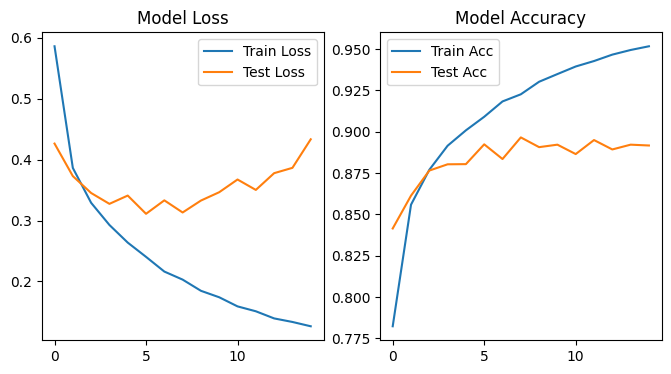

In [ ]:
plot_loss_acc(results)

In [ ]:
class CNNModel_Dropout(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_3 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_4 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (2, 2), stride = 2),
            nn.ReLU()
        )

        self.connected_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 256, out_features = 512),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 512, out_features = 10)
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_4(x)
        x = self.connected_layer(x)

        return x

In [ ]:
model_dropout = CNNModel_Dropout()

In [ ]:
optimizer = torch.optim.Adam(params = model_dropout.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(model_dropout, train_dataloader, test_dataloader, optimizer, device, loss_fcn)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1| train loss: 0.620 | train acc: 0.767 | train time: 38.173 | test loss: 0.463 | test acc: 0.823 | test time: 1.746
Epoch 2| train loss: 0.435 | train acc: 0.836 | train time: 32.758 | test loss: 0.387 | test acc: 0.851 | test time: 1.898
Epoch 3| train loss: 0.380 | train acc: 0.859 | train time: 34.227 | test loss: 0.351 | test acc: 0.867 | test time: 1.974
Epoch 4| train loss: 0.355 | train acc: 0.867 | train time: 31.168 | test loss: 0.340 | test acc: 0.875 | test time: 1.690
Epoch 5| train loss: 0.331 | train acc: 0.876 | train time: 31.738 | test loss: 0.316 | test acc: 0.883 | test time: 2.099
Epoch 6| train loss: 0.317 | train acc: 0.881 | train time: 31.737 | test loss: 0.304 | test acc: 0.886 | test time: 1.741
Epoch 7| train loss: 0.307 | train acc: 0.885 | train time: 30.388 | test loss: 0.302 | test acc: 0.890 | test time: 1.702
Epoch 8| train loss: 0.297 | train acc: 0.889 | train time: 31.259 | test loss: 0.291 | test acc: 0.896 | test time: 1.711
Epoch 9| train l

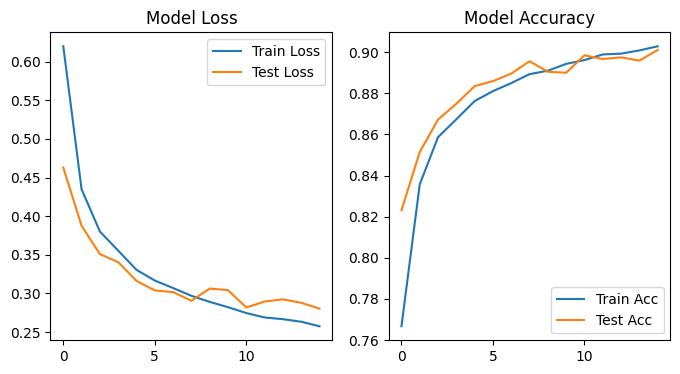

In [ ]:
plot_loss_acc(results)

In [ ]:
class CNNModel_Batch_Norm(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (3, 3), stride = 2),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), stride = 2),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.conv_layer_3 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = 2),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        self.conv_layer_4 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (2, 2), stride = 2),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        self.connected_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 256, out_features = 512),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 512, out_features = 10)
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_4(x)
        x = self.connected_layer(x)

        return x

In [ ]:
model_batchnorm = CNNModel_Batch_Norm()

In [ ]:
optimizer = torch.optim.Adam(params = model_batchnorm.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(model_batchnorm, train_dataloader, test_dataloader, optimizer, device, loss_fcn, epochs = 25)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1| train loss: 0.512 | train acc: 0.811 | train time: 45.091 | test loss: 0.391 | test acc: 0.851 | test time: 1.778
Epoch 2| train loss: 0.409 | train acc: 0.848 | train time: 36.873 | test loss: 0.435 | test acc: 0.838 | test time: 1.897
Epoch 3| train loss: 0.371 | train acc: 0.861 | train time: 35.531 | test loss: 0.324 | test acc: 0.880 | test time: 1.864
Epoch 4| train loss: 0.345 | train acc: 0.872 | train time: 34.884 | test loss: 0.320 | test acc: 0.881 | test time: 1.994
Epoch 5| train loss: 0.331 | train acc: 0.877 | train time: 34.221 | test loss: 0.325 | test acc: 0.880 | test time: 2.850
Epoch 6| train loss: 0.317 | train acc: 0.883 | train time: 34.235 | test loss: 0.295 | test acc: 0.893 | test time: 2.710
Epoch 7| train loss: 0.306 | train acc: 0.887 | train time: 34.715 | test loss: 0.286 | test acc: 0.895 | test time: 2.214
Epoch 8| train loss: 0.294 | train acc: 0.891 | train time: 34.966 | test loss: 0.283 | test acc: 0.896 | test time: 1.772
Epoch 9| train l

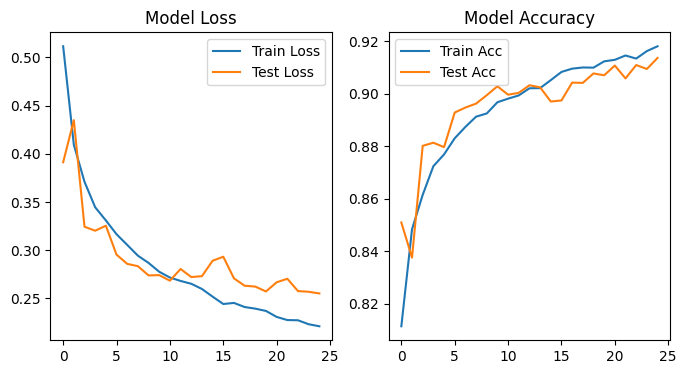

In [ ]:
plot_loss_acc(results)

In [ ]:
train_transform = v2.Compose([

    v2.RandomHorizontalFlip(p = 0.1),
    v2.RandomVerticalFlip(p = 0.1),
    v2.RandomRotation(30),
    v2.RandomZoomOut(p = 0.1),
    #v2.RandomCrop((224, 224)),
    v2.Resize(size = (28, 28)),
    v2.ToImage(), v2.ToDtype(torch.float32, scale=True)
])

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = train_transform,
    target_transform = None
)

train_dataloader = DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = num_workers)

In [ ]:
print(train_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
                 RandomHorizontalFlip(p=0.3)
                 RandomVerticalFlip(p=0.3)
                 RandomRotation(degrees=[-30.0, 30.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
                 RandomZoomOut(p=0.1, fill=0, side_range=(1.0, 4.0))
                 Resize(size=[28, 28], interpolation=InterpolationMode.BILINEAR, antialias=True)
                 ToTensor()
           )


In [ ]:
model_batchnorm_augmented = CNNModel_Batch_Norm()

In [ ]:
optimizer = torch.optim.Adam(params = model_batchnorm_augmented.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(model_batchnorm_augmented, train_dataloader, test_dataloader, optimizer, device, loss_fcn, epochs = 25)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1| train loss: 0.909 | train acc: 0.665 | train time: 45.029 | test loss: 0.540 | test acc: 0.802 | test time: 1.868
Epoch 2| train loss: 0.741 | train acc: 0.724 | train time: 43.605 | test loss: 0.469 | test acc: 0.824 | test time: 1.773
Epoch 3| train loss: 0.687 | train acc: 0.745 | train time: 46.218 | test loss: 0.451 | test acc: 0.833 | test time: 1.811
Epoch 4| train loss: 0.651 | train acc: 0.756 | train time: 44.844 | test loss: 0.443 | test acc: 0.837 | test time: 1.834
Epoch 5| train loss: 0.630 | train acc: 0.766 | train time: 45.402 | test loss: 0.407 | test acc: 0.852 | test time: 2.101
Epoch 6| train loss: 0.621 | train acc: 0.771 | train time: 43.892 | test loss: 0.397 | test acc: 0.854 | test time: 2.691
Epoch 7| train loss: 0.594 | train acc: 0.779 | train time: 43.524 | test loss: 0.385 | test acc: 0.854 | test time: 1.795
Epoch 8| train loss: 0.584 | train acc: 0.781 | train time: 45.927 | test loss: 0.372 | test acc: 0.862 | test time: 1.795
Epoch 9| train l

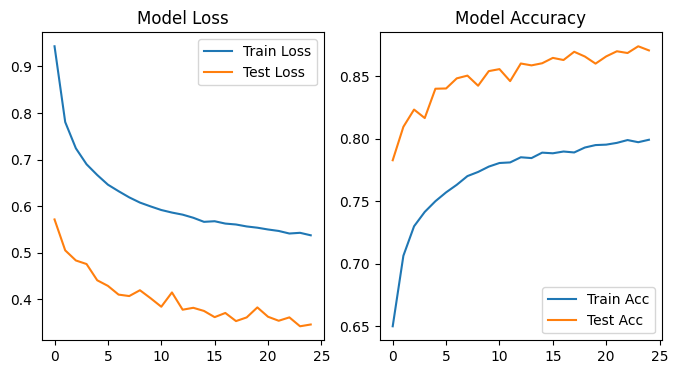

In [ ]:
plot_loss_acc(results)

In [ ]:
class CNNModel_Batch_Norm_v2(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.ZeroPad2d(2),
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2, 2))
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2, 2))
        )

        self.conv_layer_3 = nn.Sequential(
            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2, 2))
        )

        self.conv_layer_4 = nn.Sequential(
            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (2, 2), stride = 1, padding = 'same'),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (2, 2), stride = 1, padding = 'same'),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2, 2))
        )

        self.connected_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 1024, out_features = 512),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 512, out_features = 10)
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_4(x)
        x = self.connected_layer(x)

        return x

In [ ]:
model_batch_norm_augmented_v2 = CNNModel_Batch_Norm_v2().to(device)

In [ ]:
summary(model_batch_norm_augmented_v2, input_size = image.to(device).shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1            [-1, 1, 32, 32]               0
            Conv2d-2           [-1, 32, 32, 32]             320
       BatchNorm2d-3           [-1, 32, 32, 32]              64
              ReLU-4           [-1, 32, 32, 32]               0
           Dropout-5           [-1, 32, 32, 32]               0
            Conv2d-6           [-1, 32, 32, 32]           9,248
       BatchNorm2d-7           [-1, 32, 32, 32]              64
              ReLU-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
          Dropout-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          18,496
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
          Dropout-14           [-1, 64,

In [ ]:
optimizer = torch.optim.Adam(params = model_batch_norm_augmented_v2.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(model_batch_norm_augmented_v2, train_dataloader, test_dataloader, optimizer, device, loss_fcn, epochs = 25)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1| train loss: 0.750 | train acc: 0.718 | train time: 33.225 | test loss: 0.477 | test acc: 0.834 | test time: 2.520
Epoch 2| train loss: 0.546 | train acc: 0.797 | train time: 32.873 | test loss: 0.390 | test acc: 0.862 | test time: 1.905
Epoch 3| train loss: 0.488 | train acc: 0.822 | train time: 32.196 | test loss: 0.327 | test acc: 0.886 | test time: 1.831
Epoch 4| train loss: 0.451 | train acc: 0.835 | train time: 31.566 | test loss: 0.328 | test acc: 0.883 | test time: 2.711
Epoch 5| train loss: 0.428 | train acc: 0.842 | train time: 31.508 | test loss: 0.286 | test acc: 0.896 | test time: 1.807
Epoch 6| train loss: 0.411 | train acc: 0.848 | train time: 31.474 | test loss: 0.303 | test acc: 0.890 | test time: 1.821
Epoch 7| train loss: 0.393 | train acc: 0.855 | train time: 31.629 | test loss: 0.282 | test acc: 0.897 | test time: 2.745
Epoch 8| train loss: 0.381 | train acc: 0.860 | train time: 31.424 | test loss: 0.270 | test acc: 0.903 | test time: 1.846
Epoch 9| train l

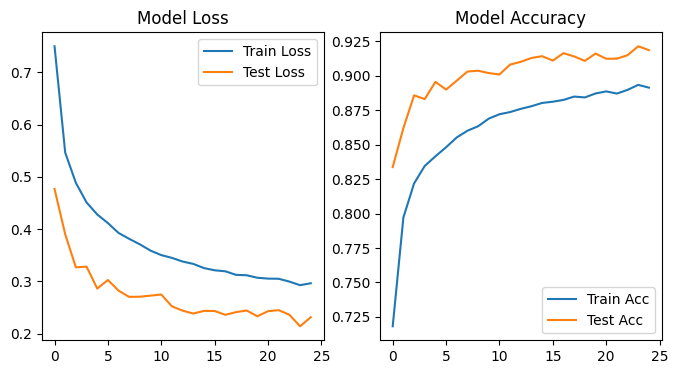

In [ ]:
plot_loss_acc(results)

#TensorFlow on cifar-10 Dataset

##Preparation

In [ ]:
cifar10 = datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print(f'X_train shape: {X_train.shape} | X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape} | y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3) | X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1) | y_test shape: (10000, 1)


In [ ]:
labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [ ]:
X_train = X_train/255.
X_test = X_test/255.

y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
def data_augmentation(flip = 'horizontal', rotation = 0.1, zoom = 0.1, cropped_size = (26, 26), stddev = 0.01):
    return Sequential([
        RandomFlip(flip),
        RandomRotation(rotation),
        RandomZoom(zoom),
       # RandomCrop(height = cropped_size[0], width = cropped_size[1]),
       # GaussianNoise(stddev = stddev)
    ])

In [ ]:
input_shape = X_train[0].shape
no_of_classes = len(labels)

augmentation = data_augmentation()

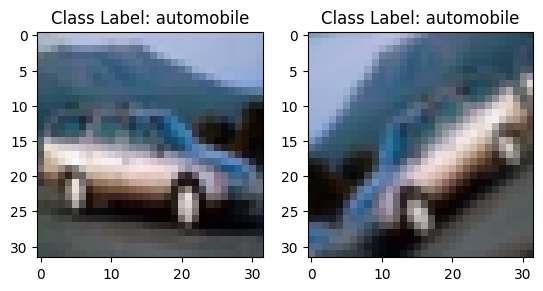

In [ ]:
image = X_train[4]
label = y_train[4]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image.squeeze())
ax[0].set_title(f'Class Label: {labels[label]}')

ax[1].imshow(augmentation(image).numpy().squeeze())
ax[1].set_title(f'Class Label: {labels[label]}')

plt.show();

##CNN Models

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 1024, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_1 = Model(i, x)

In [ ]:
model_1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 8, 8, 128)           │              

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result_1 = model_1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.3418 - loss: 2.0136 - val_accuracy: 0.4146 - val_loss: 1.8376
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.5326 - loss: 1.3044 - val_accuracy: 0.5130 - val_loss: 1.5989
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6088 - loss: 1.0983 - val_accuracy: 0.5910 - val_loss: 1.1826
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6594 - loss: 0.9799 - val_accuracy: 0.6438 - val_loss: 1.1079
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6918 - loss: 0.8865 - val_accuracy: 0.6878 - val_loss: 0.9263
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7134 - loss: 0.8278 - val_accuracy: 0.6749 - val_loss: 0.9980
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7335 - loss: 0.7730 - val_accuracy: 0.7144 - val_loss: 0.8968
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7456 -

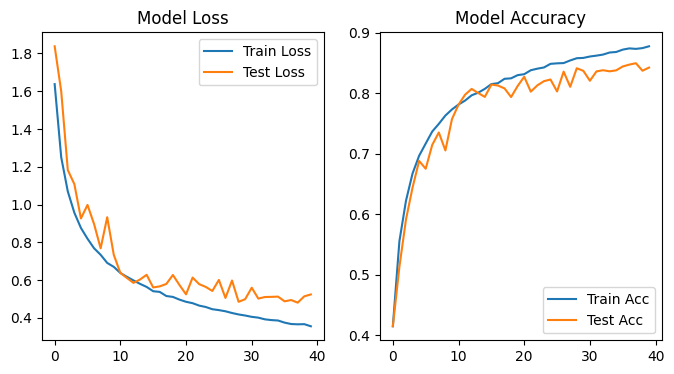

In [ ]:
plot_loss_acc(result_1)

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_2 = Model(i, x)

In [ ]:
model_2.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 16, 16, 64)          │          36,9

 Total params: 2,491,786 (9.51 MB)

 Trainable params: 2,488,906 (9.49 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [ ]:
model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result_2 = model_2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.2335 - loss: 2.1038 - val_accuracy: 0.3096 - val_loss: 2.0626
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4450 - loss: 1.4904 - val_accuracy: 0.5219 - val_loss: 1.4152
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.5629 - loss: 1.2420 - val_accuracy: 0.5535 - val_loss: 1.3168
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6195 - loss: 1.0910 - val_accuracy: 0.6012 - val_loss: 1.3263
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.6697 - loss: 0.9770 - val_accuracy: 0.6738 - val_loss: 1.0268
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7002 - loss: 0.8855 - val_accuracy: 0.6621 - val_loss: 1.0286
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7252 - loss: 0.8091 - val_accuracy: 0.7112 - val_loss: 0.9320
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.7396 -

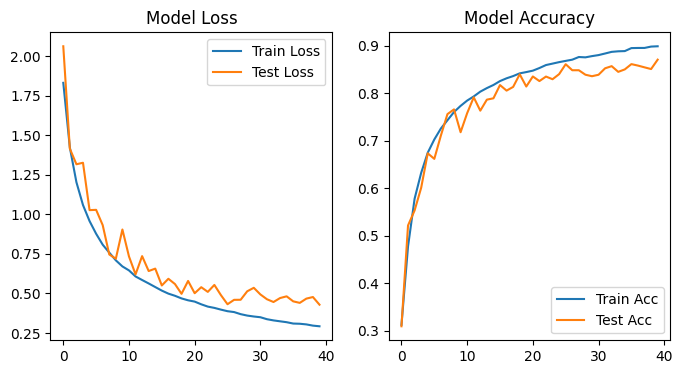

In [ ]:
plot_loss_acc(result_2)

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)

x = ZeroPadding2D((3, 3))(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x1_shortcut = x
x1_shortcut = Conv2D(filters = 64, kernel_size = (1, 1), strides = 2, padding = 'valid')(x1_shortcut)
x1_shortcut = BatchNormalization()(x1_shortcut)

x = Conv2D(filters = 64, kernel_size = (1, 1), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Add()([x1_shortcut, x])
x = Activation('relu')(x)
#x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x2_shortcut = x
x2_shortcut = Conv2D(filters = 128, kernel_size = (1, 1), strides = 2, padding = 'valid')(x2_shortcut)
x2_shortcut = BatchNormalization()(x2_shortcut)

x = Conv2D(filters = 128, kernel_size = (1, 1), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Add()([x2_shortcut, x])
x = Activation('relu')(x)
#x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x3_shortcut = x
x3_shortcut = Conv2D(filters = 1024, kernel_size = (1, 1), strides = 2, padding = 'valid')(x3_shortcut)
x3_shortcut = BatchNormalization()(x3_shortcut)

x = Conv2D(filters = 256, kernel_size = (1, 1), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 1024, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Add()([x3_shortcut, x])
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_3 = Model(i, x)

In [ ]:
model_3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 32, 32, 3)      │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_7          │ (None, 38, 38, 3)      │              0 │ sequential_3[7][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 38, 38, 64)     │          1,792 │ zero_padding2d_7[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_54    │ (None, 38, 38, 64)     │            256 │ conv2d_55[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_40             │ (None, 38, 38, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 19, 19, 64)     │              0 │ activation_40[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 10, 10, 64)     │          4,160 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_56    │ (None, 10, 10, 64)     │            256 │ conv2d_57[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_41             │ (None, 10, 10, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 10, 10, 64)     │         36,928 │ activation_41[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_57    │ (None, 10, 10, 64)     │            256 │ conv2d_58[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_42             │ (None, 10, 10, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 10, 10, 64)     │          4,160 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 10, 10, 64)     │         36,928 │ activation_42[0][0]    │
├──────────────────────

 Total params: 4,054,794 (15.47 MB)

 Trainable params: 4,048,010 (15.44 MB)

 Non-trainable params: 6,784 (26.50 KB)

In [ ]:
model_3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result_3 = model_3.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 25)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - accuracy: 0.3384 - loss: 2.0496 - val_accuracy: 0.3615 - val_loss: 1.8545
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5144 - loss: 1.3691 - val_accuracy: 0.4623 - val_loss: 1.5344
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 0.5699 - loss: 1.2175 - val_accuracy: 0.5510 - val_loss: 1.2559
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.6051 - loss: 1.1318 - val_accuracy: 0.4492 - val_loss: 1.7201
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6353 - loss: 1.0504 - val_accuracy: 0.5781 - val_loss: 1.2665
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6516 - loss: 0.9909 - val_accuracy: 0.5709 - val_loss: 1.4042
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6674 - loss: 0.9482 - val_accuracy: 0.5934 - val_loss: 1.1999
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6803 - loss: 0.9136 - 

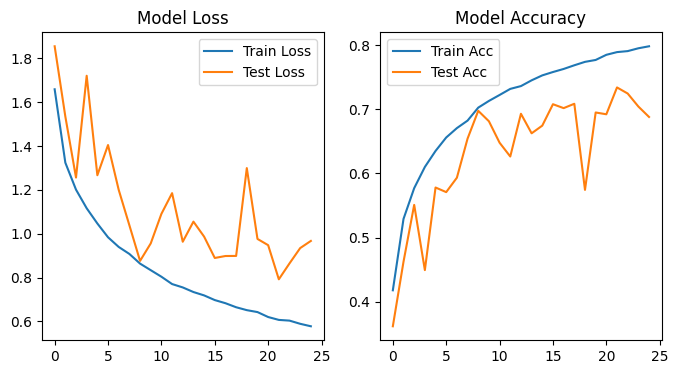

In [ ]:
plot_loss_acc(result_3)

## Skip Connection/ Residual Network

In [ ]:
def id_block(x, f, filters):

    f_1, f_2, f_3 = filters

    x_shortcut = x

    x = Conv2D(filters = f_1, kernel_size = (1, 1), strides = 1, padding = 'valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters = f_2, kernel_size = (f, f), strides = 1, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters = f_3, kernel_size = (1, 1), strides = 1, padding = 'valid')(x)
    x = BatchNormalization()(x)

    x = Add()([x_shortcut, x])
    x = Activation('relu')(x)

    return x

In [ ]:
def conv_block(x, f, filters, s):

    f_1, f_2, f_3 = filters

    x_shortcut = x

    x = Conv2D(filters = f_1, kernel_size = (1, 1), strides = s, padding = 'valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters = f_2, kernel_size = (f, f), strides = 1, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters = f_3, kernel_size = (1, 1), strides = 1, padding = 'valid')(x)
    x = BatchNormalization()(x)

    x_shortcut = Conv2D(filters = f_3, kernel_size = (1, 1), strides = s, padding = 'valid')(x_shortcut)
    x_shortcut = BatchNormalization()(x_shortcut)

    x = Add()([x_shortcut, x])
    x = Activation('relu')(x)

    return x

In [ ]:
i = Input(shape = input_shape)
#x = augmentation(i)

x = ZeroPadding2D((2,2))(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = conv_block(x, f = 3, filters = [32, 32, 128], s = 2)
x = id_block(x, f = 3, filters = [32, 32, 128])
x = id_block(x, f = 3, filters = [32, 32, 128])

x = conv_block(x, f = 3, filters = [64, 64, 256], s = 2)
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])

x = conv_block(x, f = 3, filters = [128, 128, 512], s = 2)
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])

x = MaxPooling2D(pool_size = (2,2), strides = 1)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

ResNet = Model(i, x)

In [ ]:
ResNet.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 36, 36, 3)      │              0 │ input_layer_4[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_99 (Conv2D)        │ (None, 36, 36, 32)     │            896 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_99    │ (None, 36, 36, 32)     │            128 │ conv2d_99[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_90             │ (None, 36, 36, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 18, 18, 32)     │              0 │ activation_90[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_100 (Conv2D)       │ (None, 9, 9, 32)       │          1,056 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_100   │ (None, 9, 9, 32)       │            128 │ conv2d_100[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_91             │ (None, 9, 9, 32)       │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_101 (Conv2D)       │ (None, 9, 9, 32)       │          9,248 │ activation_91[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_101   │ (None, 9, 9, 32)       │            128 │ conv2d_101[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_92             │ (None, 9, 9, 32)       │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_103 (Conv2D)       │ (None, 9, 9, 128)      │          4,224 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_102 (Conv2D)       │ (None, 9, 9, 128)      │          4,224 │ activation_92[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_103   │ (None, 9, 9, 128)      │            512 │ conv2d_103[0][0]       │
│ (BatchNormalization) 

 Total params: 2,654,410 (10.13 MB)

 Trainable params: 2,642,186 (10.08 MB)

 Non-trainable params: 12,224 (47.75 KB)

In [ ]:
ResNet.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ResNet = ResNet.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.2168 - loss: 2.8494 - val_accuracy: 0.3868 - val_loss: 1.6397
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.4322 - loss: 1.5454 - val_accuracy: 0.3764 - val_loss: 1.7920
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.4946 - loss: 1.4148 - val_accuracy: 0.4576 - val_loss: 1.5210
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5502 - loss: 1.2900 - val_accuracy: 0.5379 - val_loss: 1.2518
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.5598 - loss: 1.2527 - val_accuracy: 0.5269 - val_loss: 1.3465
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5675 - loss: 1.2355 - val_accuracy: 0.5422 - val_loss: 1.3423
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.5560 - loss: 1.2607 - val_accuracy: 0.5956 - val_loss: 1.1527
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.6164 -

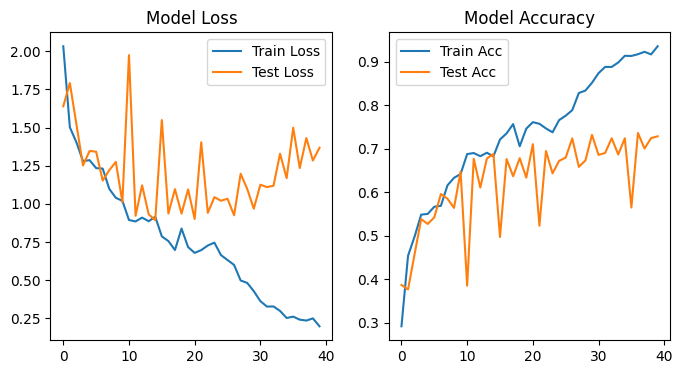

In [ ]:
plot_loss_acc(ResNet)

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)

x = ZeroPadding2D((2,2))(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = conv_block(x, f = 3, filters = [32, 32, 128], s = 2)
x = id_block(x, f = 3, filters = [32, 32, 128])
x = id_block(x, f = 3, filters = [32, 32, 128])

x = conv_block(x, f = 3, filters = [64, 64, 256], s = 2)
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])

x = conv_block(x, f = 3, filters = [128, 128, 512], s = 2)
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])

x = MaxPooling2D(pool_size = (2,2), strides = 1)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

ResNet_2 = Model(i, x)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_dataset = train_dataset.shuffle(buffer_size = 10_000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
ResNet_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ResNet_2 = ResNet_2.fit(train_dataset, validation_data = test_dataset, epochs = 40)

Epoch 1/40
 416/1563 ━━━━━━━━━━━━━━━━━━━━ 1:10 61ms/step - accuracy: 0.1367 - loss: 4.3809

KeyboardInterrupt: 

In [ ]:
i = Input(shape = input_shape)
#x = augmentation(i)

x = ZeroPadding2D((3,3))(i)
x = Conv2D(filters = 64, kernel_size = (7, 7), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (3,3), strides = 2)(x)

x = conv_block(x, f = 3, filters = [64, 64, 256], s = 1)
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])

x = conv_block(x, f = 3, filters = [128, 128, 512], s = 2)
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])

x = conv_block(x, f = 3, filters = [256, 256, 1024], s = 2)
x = id_block(x, f = 3, filters = [256, 256, 1024])
x = id_block(x, f = 3, filters = [256, 256, 1024])
x = id_block(x, f = 3, filters = [256, 256, 1024])
x = id_block(x, f = 3, filters = [256, 256, 1024])
x = id_block(x, f = 3, filters = [256, 256, 1024])

x = conv_block(x, f = 3, filters = [512, 512, 2048], s = 2)
x = id_block(x, f = 3, filters = [512, 512, 2048])
x = id_block(x, f = 3, filters = [512, 512, 2048])

#x = AveragePooling2D(pool_size = (2,2))(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

ResNet_50 = Model(i, x)

In [ ]:
ResNet_50.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_7          │ (None, 38, 38, 3)      │              0 │ input_layer_8[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_279 (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ zero_padding2d_7[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_279   │ (None, 16, 16, 64)     │            256 │ conv2d_279[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_256            │ (None, 16, 16, 64)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 7, 7, 64)       │              0 │ activation_256[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_280 (Conv2D)       │ (None, 7, 7, 64)       │          4,160 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_280   │ (None, 7, 7, 64)       │            256 │ conv2d_280[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_257            │ (None, 7, 7, 64)       │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_281 (Conv2D)       │ (None, 7, 7, 64)       │         36,928 │ activation_257[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_281   │ (None, 7, 7, 64)       │            256 │ conv2d_281[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_258            │ (None, 7, 7, 64)       │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_283 (Conv2D)       │ (None, 7, 7, 256)      │         16,640 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_282 (Conv2D)       │ (None, 7, 7, 256)      │         16,640 │ activation_258[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_283   │ (None, 7, 7, 256)      │          1,024 │ conv2d_283[0][0]       │
│ (BatchNormalization) 

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
ResNet_50.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ResNet_50 = ResNet_50.fit(train_dataset, validation_data = test_dataset, epochs = 40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 47ms/step - accuracy: 0.2732 - loss: 2.1227 - val_accuracy: 0.4330 - val_loss: 1.5348
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 31ms/step - accuracy: 0.4178 - loss: 1.6106 - val_accuracy: 0.2698 - val_loss: 1.9972
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.4908 - loss: 1.4281 - val_accuracy: 0.2691 - val_loss: 2.1206
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4166 - loss: 1.6028 - val_accuracy: 0.1828 - val_loss: 2.8829
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4192 - loss: 1.6028 - val_accuracy: 0.4430 - val_loss: 1.5077
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.4793 - loss: 1.4732 - val_accuracy: 0.2969 - val_loss: 1.9307
Epoch 7/40


#PyTorch on cifar-10 Dataset

##Preparation

In [ ]:
train_transform = v2.Compose([

    v2.RandomHorizontalFlip(p = 0.1),
    v2.RandomVerticalFlip(p = 0.1),
    v2.RandomRotation(30),
    v2.RandomZoomOut(p = 0.1),
    #v2.RandomCrop((224, 224)),
    v2.Resize(size = (32, 32)),
    v2.ToImage(), v2.ToDtype(torch.float32, scale=True)
])

In [ ]:
train_data = datasets.CIFAR10(
    root = "data",
    train = True,
    download = True,
    transform = train_transform,
    target_transform = None
)

test_data = datasets.CIFAR10(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 170M/170M [00:08<00:00, 20.4MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
image, label = train_data[0]

class_names = train_data.classes
print(image.shape)
print(class_names)

torch.Size([3, 32, 32])
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


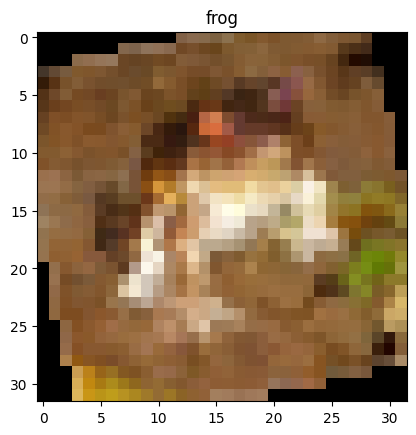

In [ ]:
fig, ax = plt.subplots()

plt.imshow(image.permute(1, 2, 0))
ax.set_title(label = class_names[label])
plt.show();

In [ ]:
batch_size = 32
num_workers = os.cpu_count()

train_dataloader = DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = num_workers)
test_dataloader = DataLoader(test_data, batch_size = batch_size, shuffle = False, num_workers = num_workers)

##CNN Models

In [ ]:
class CNNModel_Batch_Norm_v3(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.ZeroPad2d(2),
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2, 2))
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2, 2))
        )

        self.conv_layer_3 = nn.Sequential(
            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (3, 3), stride = 1, padding = 'same'),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2, 2))
        )

        self.conv_layer_4 = nn.Sequential(
            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (2, 2), stride = 1, padding = 'same'),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.Dropout(p = 0.1),
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (2, 2), stride = 1, padding = 'same'),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2, 2))
        )

        self.connected_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 1024, out_features = 512),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 512, out_features = 10)
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_4(x)
        x = self.connected_layer(x)

        return x

In [ ]:
model_batch_norm_augmented_v3 = CNNModel_Batch_Norm_v3().to(device)

In [ ]:
optimizer = torch.optim.Adam(params = model_batch_norm_augmented_v3.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(model_batch_norm_augmented_v3, train_dataloader, test_dataloader, optimizer, device, loss_fcn, epochs = 25)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1| train loss: 1.684 | train acc: 0.380 | train time: 37.963 | test loss: 1.384 | test acc: 0.496 | test time: 2.050
Epoch 2| train loss: 1.412 | train acc: 0.485 | train time: 31.929 | test loss: 1.161 | test acc: 0.582 | test time: 2.029
Epoch 3| train loss: 1.305 | train acc: 0.527 | train time: 40.448 | test loss: 1.000 | test acc: 0.643 | test time: 3.482
Epoch 4| train loss: 1.214 | train acc: 0.560 | train time: 33.578 | test loss: 0.937 | test acc: 0.668 | test time: 3.301
Epoch 5| train loss: 1.150 | train acc: 0.589 | train time: 31.559 | test loss: 0.900 | test acc: 0.685 | test time: 2.168
Epoch 6| train loss: 1.085 | train acc: 0.615 | train time: 32.067 | test loss: 0.818 | test acc: 0.709 | test time: 2.089
Epoch 7| train loss: 1.036 | train acc: 0.634 | train time: 33.322 | test loss: 0.748 | test acc: 0.737 | test time: 2.385
Epoch 8| train loss: 0.997 | train acc: 0.648 | train time: 32.495 | test loss: 0.710 | test acc: 0.751 | test time: 2.085
Epoch 9| train l

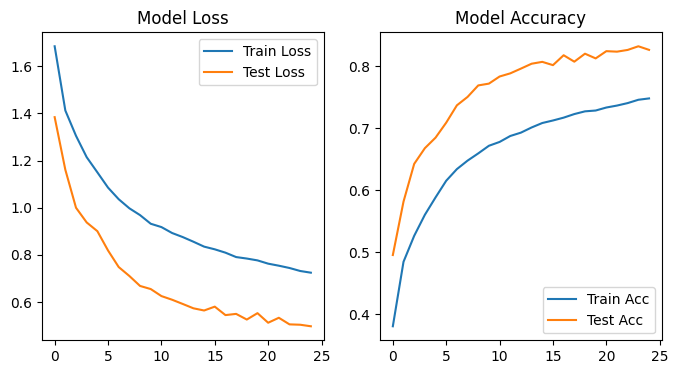

In [ ]:
plot_loss_acc(results)